# Experiment 1: K-Means Clustering

## Imports and Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%cd ..
from src.models.kmeans import KMeans, KMeansInit
from src.utils.metrics import *
from src.utils.utils import *

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

c:\Users\ziade\OneDrive\Desktop\Term 7\ML\Lab 4\Assignment4-Unsupervised-Clustering-Analysis


## Data Loading and Preprocessing

In [2]:
X_scaled, y_true = load_scale_data(data_path='./data/breast_cancer.csv')

print(f"Dataset shape: {X_scaled.shape}")
print(f"Labels shape: {y_true.shape}")

Dataset shape: (569, 30)
Labels shape: (569,)


## Finding Optimal $k$ - Elbow Method and Silhouette

In [3]:
k_range = range(2, 11)
inertias = []
silhouette_vals = []
db_vals = []
ch_vals = []

for k in k_range:
    model = KMeans(K=k, init=KMeansInit.KMEANS_PLUS_PLUS, random_state=RANDOM_SEED)
    model.fit(X_scaled)
    inertias.append(model.inertia_history[-1])
    silhouette_vals.append(compute_silhouette_score(X_scaled, model.clusters))
    db_vals.append(compute_davies_bouldin(X_scaled, model.clusters))
    ch_vals.append(compute_calinski_harabasz(X_scaled, model.clusters))

```Plot Elbow Curve ``` 

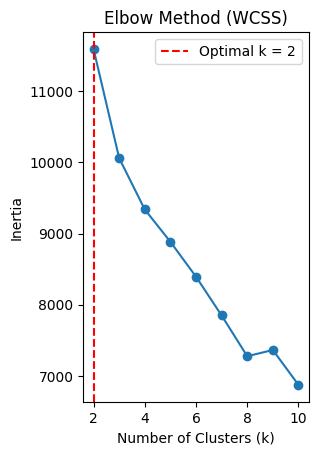

In [4]:
optimal_k = k_range[np.argmax(silhouette_vals)]

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()


```Plot Silhouette Analysis```

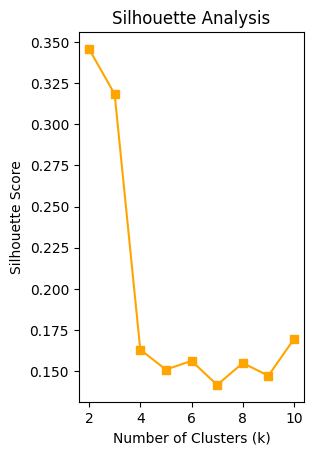

In [5]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_vals, marker='s', color='orange')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

###

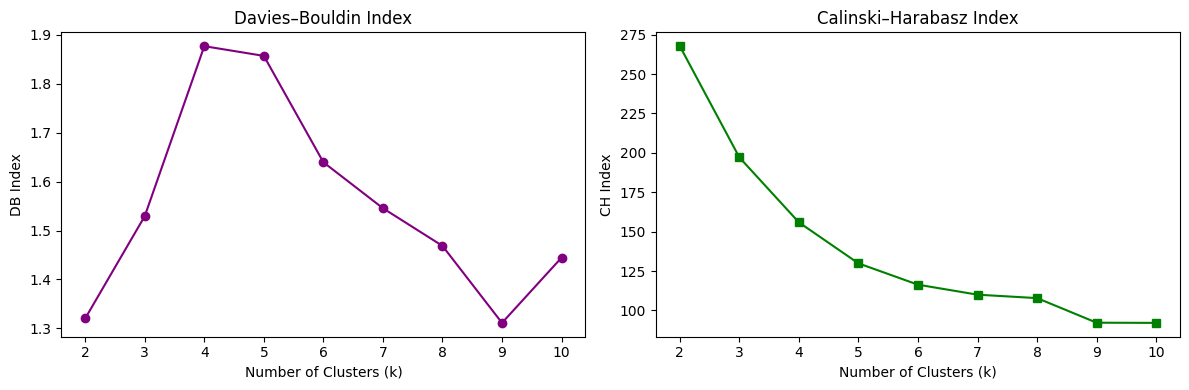

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, db_vals, marker='o', color='purple')
plt.title("Davies–Bouldin Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")

plt.subplot(1, 2, 2)
plt.plot(k_range, ch_vals, marker='s', color='green')
plt.title("Calinski–Harabasz Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("CH Index")

plt.tight_layout()
plt.show()


## Gap Statistic Visualization

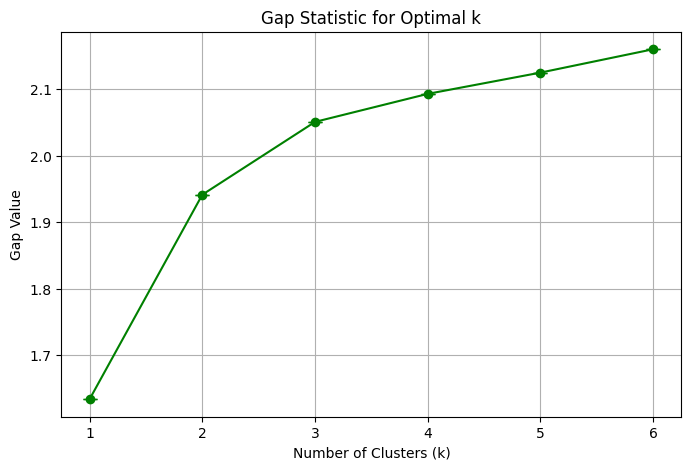

Optimal k suggested by Gap Statistic: 6


In [7]:
k_range = range(1, 7) 
gaps, errors = compute_gap_statistic(X_scaled, k_range, n_references=3)

plt.figure(figsize=(8, 5))
plt.errorbar(k_range, gaps, yerr=errors, capsize=5, color='green', marker='o')
plt.title("Gap Statistic for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Gap Value")
plt.grid(True)
plt.show()

# The optimal k is the smallest k such that Gap(k) >= Gap(k+1) - Error(k+1)
optimal_k_gap = k_range[np.argmax(gaps)]
print(f"Optimal k suggested by Gap Statistic: {optimal_k_gap}")

## Convergence Speed and Initialization Comparison

In [8]:
# Comparing convergence speed 
k_best = 2

# K-Means++
start_pp = time.time()
km_pp = KMeans(K=k_best, init=KMeansInit.KMEANS_PLUS_PLUS, random_state=RANDOM_SEED)
km_pp.fit(X_scaled)
time_pp = time.time() - start_pp

# Random
start_rand = time.time()
km_rand = KMeans(K=k_best, init=KMeansInit.RANDOM, random_state=RANDOM_SEED)
km_rand.fit(X_scaled)
time_rand = time.time() - start_rand

print(f"K-Means++ iterations: {len(km_pp.inertia_history)}, Time: {time_pp:.4f}s")
print(f"Random iterations: {len(km_rand.inertia_history)}, Time: {time_rand:.4f}s")

K-Means++ iterations: 4, Time: 0.0040s
Random iterations: 9, Time: 0.0017s


## Visualizing Cluster Assignments

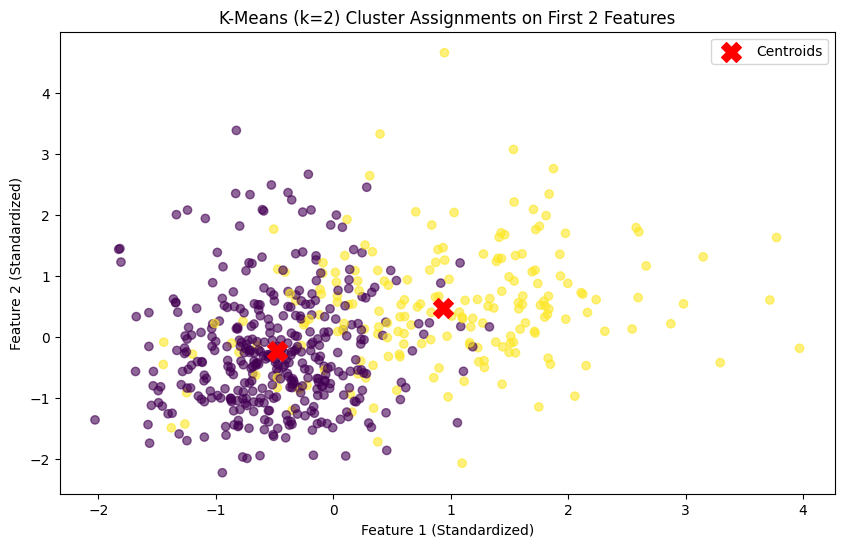

In [9]:
# Projecting to 2D using first two features for simple visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km_pp.clusters, cmap='viridis', alpha=0.6)
plt.scatter(km_pp.centroids[:, 0], km_pp.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means (k={k_best}) Cluster Assignments on First 2 Features")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()

## Final Evaluation & Confusion Matrix

```Purity Calculation```

In [10]:
purity = purity_score(y_true, km_pp.clusters)
print(f"Clustering Purity: {purity:.4f}")

Clustering Purity: 0.9051


```Confusion Matrix derivation```

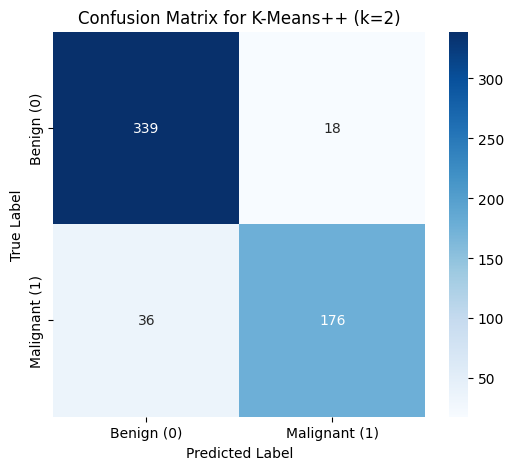

Post-alignment Clustering Accuracy: 0.9051
Adjusted Rand Index (ARI): 0.6536
Normalized Mutual Information (NMI): 0.5324


In [11]:
# 1. Align the unsupervised clusters with the actual labels
y_pred_aligned = align_clusters_with_labels(y_true, km_pp.clusters)

# 2. Compute the matrix
cm = compute_confusion_matrix(y_true, y_pred_aligned)

# 3. Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title("Confusion Matrix for K-Means++ (k=2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)
print(f"Post-alignment Clustering Accuracy: {accuracy:.4f}")

ari = compute_ari(y_true, km_pp.clusters)
nmi = compute_nmi(y_true, km_pp.clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
